In [1]:
import random as rn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_random_probability():
    #Generates random probability to decide whether to select from parent 1 or 2 or mutate
    return rn.randint(0 , 100)/100

In [3]:
def mutate_gene():
    #Generates a random character for mutation
    characters = "abcdef ghijklm nop qrstuvwxyz"
    index = rn.randint(0 , len(characters))
    return characters[index-1]

In [4]:
def fitness(population , target = 'aniruth is best'):
    #Calculates the fitness score of each individual in a population
    match = 0
    miss = 0
    score = []
    for individual in population:
        #print(individual)
        for i in range(len(individual)):
            if (individual[i].lower() == target[i].lower()):
                match+=1
            else:
                miss+=1
        score.append(match/(match+miss))
    return score

In [5]:
def crossover(male_chromosome, female_chromosome):
    #Does crossover for 2 genes
    child = ""
    population = []
    for i in range(16):
        for i in range(len(male_chromosome)):
            probability = generate_random_probability()
            if (probability < 0.4):
                child+=(male_chromosome[i])
            elif (probability<0.99):
                child+=(female_chromosome[i])
            else:
                child+=(mutate_gene())
        population.append(child)
        child = ""
    return population

In [6]:
def select_best(population):
    #Selects the best 2 individuals from a population
    score = fitness(population)
    copy = sorted(score.copy())
    male = copy[-1]
    female = copy[-2]
    return score.index(male) , score.index(female)

In [7]:
population = ['Anerruh si bsti' , 'anrhtu is besti' , 'aniruth tbsi si' , 'best aniruth is'] #Initial Population

In [8]:
Generation = 1
Score = []
while(True):
    #Implement Genetic Algorithm
    male , female = select_best(population)
    child = crossover(population[male] , population[female])
    score = fitness(child)
    flag = 1
    for i in score:
        if (i >0.95):
            #Break Condition
            print(child[score.index(i)] , i)
            flag = 0
            break
    if (flag == 0):
        break
    population = child
    best_male , best_female = select_best(population)
    print("Generation" , Generation , population[best_male] , score[best_male])
    Score.append(score[best_male])
    Generation+=1

Generation 1 Aniruuh si issi 0.56
Generation 2 Aniruth ti issi 0.5733333333333334
Generation 3 Aniruth ti i si 0.6666666666666666
Generation 4 Aniruth ti i si 0.6666666666666666
Generation 5 Aniruth ti i si 0.6666666666666666
Generation 6 Aniruth ti i si 0.6666666666666666
Generation 7 Aniruth ti i si 0.6666666666666666
Generation 8 Aniruth ts i si 0.6592592592592592
Generation 9 Aniruth ts i si 0.7333333333333333
Generation 10 Aniruth ts i si 0.7333333333333333
Generation 11 Aniruth ts i si 0.7333333333333333
Generation 12 Aniruth ts   si 0.7333333333333333
Generation 13 Aniruth ts i si 0.7333333333333333
Generation 14 Aniruth ts i si 0.7333333333333333
Generation 15 Aniruth ts i si 0.7282051282051282
Generation 16 Aniruth ts i si 0.7333333333333333
Generation 17 Aniruth ts i si 0.7291666666666666
Generation 18 Aniruth ts i si 0.7333333333333333
Generation 19 Aniruth ts i si 0.7333333333333333
Generation 20 Aniruth ts i si 0.7333333333333333
Generation 21 Aniruth ts i si 0.73333333333

In [9]:
generation =  [i for i in range(0 , Generation-1)]

Text(0, 0.5, 'Score')

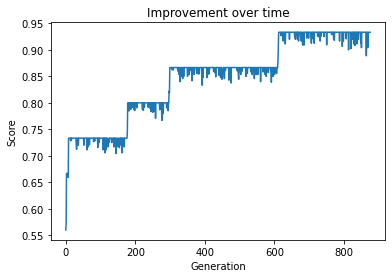

In [10]:
plt.plot(generation , Score)
plt.title('Improvement over time')
plt.xlabel('Generation')
plt.ylabel('Score')